<h1 style="color:#008000;font-size:30px">  Machine Learning Part Covid-19 Project: </h1>
<h3 style="color:#8B0000;">Imported All the necessary libraries:</h3>

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from dateutil.relativedelta import relativedelta
plt.rcParams.update({'figure.max_open_warning': 0})

<h3 style="color:#8B0000;">Imported the dataset and extract relevant Data columns:</h3>

In [9]:

date = []
new_cases = []
total_cases = []
new_vaccined = []
total_vaccined = []
population = []
location = []
vaccained_of_pop = []
ncases_of_pop = []

complete_dataset = pd.read_csv("owid-covid-data.csv")
complete_dataset.dropna()
for index,row in complete_dataset.iterrows():
    date.append(row['date'])
    new_cases.append(row['new_cases'])
    total_cases.append(row['total_cases'])
    new_vaccined.append(row['new_vaccinations'])
    total_vaccined.append(row['people_fully_vaccinated'])
    location.append(row['location'])
    population.append(row['population'])
    try:
        precent = (int(row['people_fully_vaccinated']) / int(row['population'])*100)
    except ValueError:
        precent= -1
    vaccained_of_pop.append(precent)
    try:
        precent = (int(row['new_cases']) / int(row['population'])*100)
    except ValueError:
        precent = -1
    ncases_of_pop.append(precent)

<h3 style="color:#8B0000;">Dataset handeling and spliting to pre vaccaine and after vaccaine:</h3>

,location,date,new cases,total cases,new vaccined,total vaccined,population,precent of population,new cases of population
442,Afghanistan,2021-05-11,340.0,62403.0,0.0,55624.0,38928341.0,0.142888,0.000873
451,Afghanistan,2021-05-20,453.0,64575.0,0.0,77560.0,38928341.0,0.199238,0.001164
455,Afghanistan,2021-05-24,547.0,66275.0,0.0,96910.0,38928341.0,0.248945,0.001405
457,Afghanistan,2021-05-26,840.0,67743.0,0.0,111082.0,38928341.0,0.285350,0.002158
458,Afghanistan,2021-05-27,623.0,68366.0,2859.0,113739.0,38928341.0,0.292175,0.001600
461,Afghanistan,2021-05-30,650.0,70761.0,0.0,119926.0,38928341.0,0.308069,0.001670
464,Afghanistan,2021-06-02,1049.0,74026.0,0.0,144600.0,38928341.0,0.371452,0.002695
465,Afghanistan,2021-06-03,1093.0,75119.0,4015.0,148505.0,38928341.0,0.381483,0.002808
470,Afghanistan,2021-06-08,1485.0,82326.0,0.0,158343.0,38928341.0,0.406755,0.003815
476,Afghanistan,2021-06-14,1597.0,91458.0,0.0,177266.0,38928341.0,0.455365,0.004102


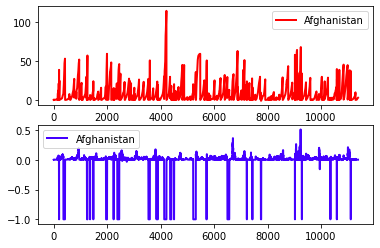

In [11]:
updated_df = pd.DataFrame({"location": location,"date":date,"new cases":new_cases,"total cases":total_cases,"new vaccined":new_vaccined,"total vaccined":total_vaccined,"population":population,"precent of population":vaccained_of_pop,"new cases of population":ncases_of_pop})
updated_df = updated_df.fillna(0.0)
updated_df['date'] = pd.to_datetime(updated_df['date'])
new_df = (updated_df.where(updated_df['total vaccined'] != 0)).dropna()
day_count = pd.DataFrame({"location": new_df['location'],"day count": int(0),"new cases":new_df['new cases'],"total cases":new_df['total cases'],"new vaccined":new_df['new vaccined'],"total vaccined":new_df['total vaccined'],"population":new_df['population'],"precent of population":new_df['precent of population'],"new cases of population":new_df['new cases of population']})
for location in day_count['location'].drop_duplicates():
    i=1
    for index, row in (day_count.where(day_count['location']==location).dropna()).iterrows():
        day_count.at[index,['day count']] = i
        i = i+1
for location in day_count.drop_duplicates('location')['location']:
    fig, axs = plt.subplots(2)
    axs[0].plot(day_count['day count'].where(day_count['location'] == location).dropna() ,day_count['precent of population'].where(day_count['location'] == location).dropna(),linewidth=2.0,label = location , linestyle = "-", color = "#FF0000")
    axs[1].plot(day_count['day count'].where(day_count['location'] == location).dropna() ,day_count['new cases of population'].where(day_count['location'] == location).dropna(),linewidth=2.0,label = location , linestyle = "-", color = "#4400FF")
    axs[0].legend()
    axs[1].legend()
    fig.savefig('./countrys/'+location+'.png', bbox_inches='tight')
new_df.head(10)


<h3 style="color:#8B0000;">Extract some new features(Day, Dayofweek, Month, year) from date column:</h3>

In [12]:
day_count['Day'] = new_df['date'].dt.day
day_count['Dayofweek'] = new_df['date'].dt.dayofweek
day_count['Month'] = new_df['date'].dt.month
day_count['year'] = new_df['date'].dt.year


day_count.tail(10)

,location,day count,new cases,total cases,new vaccined,total vaccined,population,precent of population,new cases of population,Day,Dayofweek,Month,year
96638,Afghanistan,11376,24.0,39168.0,5713.0,375315.0,14862927.0,2.525176,0.000161,5,5,6,2021
96639,Afghanistan,11377,21.0,39189.0,6156.0,380786.0,14862927.0,2.561985,0.000141,6,6,6,2021
96640,Afghanistan,11378,49.0,39238.0,5864.0,385275.0,14862927.0,2.592188,0.000330,7,0,6,2021
96641,Afghanistan,11379,83.0,39321.0,4838.0,389412.0,14862927.0,2.620022,0.000558,8,1,6,2021
96642,Afghanistan,11380,111.0,39432.0,5174.0,394063.0,14862927.0,2.651315,0.000747,9,2,6,2021
96643,Afghanistan,11381,64.0,39496.0,5523.0,399054.0,14862927.0,2.684895,0.000431,10,3,6,2021
96644,Afghanistan,11382,192.0,39688.0,7348.0,405603.0,14862927.0,2.728958,0.001292,11,4,6,2021
96645,Afghanistan,11383,164.0,39852.0,6544.0,411218.0,14862927.0,2.766736,0.001103,12,5,6,2021
96646,Afghanistan,11384,107.0,39959.0,3660.0,413911.0,14862927.0,2.784855,0.000720,13,6,6,2021
96647,Afghanistan,11385,118.0,40077.0,1145.0,414635.0,14862927.0,2.789726,0.000794,14,0,6,2021


<h3 style="color:#8B0000;">Encode location column using LabelEncoder :</h3>

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
day_count['location'] = encoder.fit_transform(day_count.location)
day_count.tail(10)

,location,day count,new cases,total cases,new vaccined,total vaccined,population,precent of population,new cases of population,Day,Dayofweek,Month,year
96638,0,11376,24.0,39168.0,5713.0,375315.0,14862927.0,2.525176,0.000161,5,5,6,2021
96639,0,11377,21.0,39189.0,6156.0,380786.0,14862927.0,2.561985,0.000141,6,6,6,2021
96640,0,11378,49.0,39238.0,5864.0,385275.0,14862927.0,2.592188,0.000330,7,0,6,2021
96641,0,11379,83.0,39321.0,4838.0,389412.0,14862927.0,2.620022,0.000558,8,1,6,2021
96642,0,11380,111.0,39432.0,5174.0,394063.0,14862927.0,2.651315,0.000747,9,2,6,2021
96643,0,11381,64.0,39496.0,5523.0,399054.0,14862927.0,2.684895,0.000431,10,3,6,2021
96644,0,11382,192.0,39688.0,7348.0,405603.0,14862927.0,2.728958,0.001292,11,4,6,2021
96645,0,11383,164.0,39852.0,6544.0,411218.0,14862927.0,2.766736,0.001103,12,5,6,2021
96646,0,11384,107.0,39959.0,3660.0,413911.0,14862927.0,2.784855,0.000720,13,6,6,2021
96647,0,11385,118.0,40077.0,1145.0,414635.0,14862927.0,2.789726,0.000794,14,0,6,2021


<h1 style="color:#008000;font-size:30px">  Machine Learning Part for 'precent of population' </h1>

<h3 style="color:#8B0000;">Make a copy of the day_count data frame to df1:</h3>

In [14]:
df1 = day_count.copy()

<h3 style="color:#8B0000;"> Make the histograme of 'precent of population' column to see the distribution:</h3>

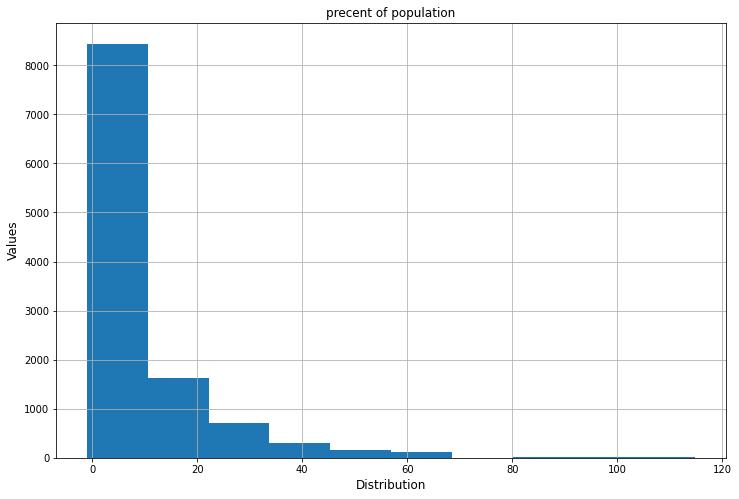

In [15]:
df1["precent of population"].hist(figsize=(12,8))
plt.xlabel("Distribution",fontsize = 12)
plt.ylabel("Values",fontsize = 12)
plt.title("precent of population",fontsize = 12)
plt.show()

<h3 style="color:#8B0000;"> Take log of 'precent of population' column to make the histogram standard:</h3>

c:\users\idan\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

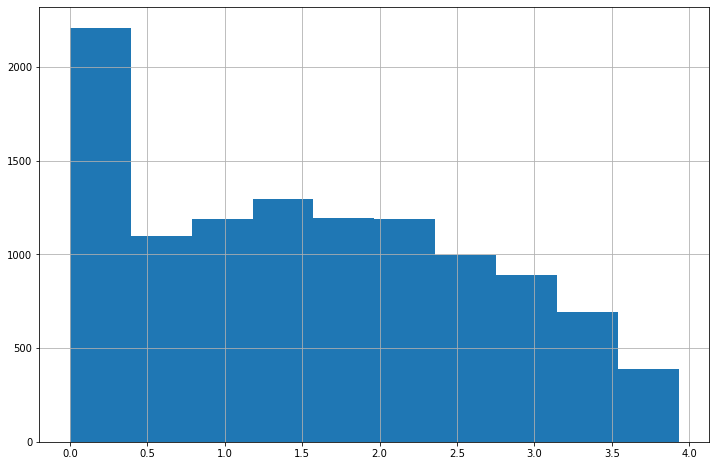

In [16]:
df1 = df1[df1['precent of population'] < 50]
df1.reset_index(drop=True, inplace=True)
df1['precent of population'] = np.log1p(df1['precent of population'])
df1= df1[np.isfinite(df1['precent of population'])]
df1['precent of population'].hist(figsize=(12,8))

 <h3 style="color:#8B0000;"> Storing Features into "X" matrix and Response (precent of population) into "y" vector:</h3>

In [17]:
#Features
X = df1.loc[:,df1.columns != 'precent of population']
#Response
y = df1['precent of population']  

<h3 style="color:#8B0000;">Divide the dataset into training set and testing set (80 percent train and 20 percent test):</h3>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  

## Decision Tree  Regression Model:

<h3 style="color:#8B0000;">Import DecisionTreeRegressor from sklearn tree class:</h3>


In [19]:
from sklearn.tree import DecisionTreeRegressor

<h3 style="color:#8B0000;">Initialize the DecisionTreeRegressor model with  default parameters:</h3>

In [20]:
Dt_regressor = DecisionTreeRegressor()

<h3 style="color:#8B0000;">Train the DecisionTreeRegressor model on trainig data set:</h3>

In [21]:
Dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

<h3 style="color:#8B0000;">Make predictions using DecisionTreeRegressor and display the first 30 predicted values:</h3>

In [22]:
y_pred = Dt_regressor.predict(X_test)
y_pred[0:30]

array([2.04177007e+00, 7.18781529e-01, 3.79356476e+00, 1.40763877e+00,
       1.59325253e+00, 1.09663032e-01, 2.30609036e+00, 8.00289385e-05,
       1.09278468e+00, 2.45378305e+00, 1.96648057e-01, 7.66771324e-01,
       1.11908979e+00, 1.61371985e+00, 1.22345012e+00, 3.33275638e+00,
       2.24165596e+00, 1.44953337e+00, 2.75093643e+00, 2.22995545e-01,
       8.25880749e-02, 1.68027502e+00, 1.56668149e+00, 2.06247465e+00,
       1.21218647e+00, 1.51190464e+00, 2.55225027e-01, 1.53960797e+00,
       2.10092483e-02, 2.98725478e+00])

<h3 style="color:#8B0000;">Compare the Actual Vs Predictd Values in the Test Set:</h3>

In [23]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2.head(10)  

,Actual,Predicted
1156,2.051371,2.041770
10624,0.698625,0.718782
10610,3.804133,3.793565
8277,1.419651,1.407639
5094,1.663486,1.593253
9622,0.096846,0.109663
10289,2.301293,2.306090
4488,0.000080,0.000080
10771,1.092283,1.092785
6897,2.396177,2.453783


<h3 style="color:#8B0000;"> Evaluate the DecisionTreeRegressor Model Using R2 and  RMSE evaluation metrics:</h3>

In [24]:
from sklearn import metrics  
Dt_R2_score = metrics.r2_score(y_test, y_pred)
print('R2 Score:', Dt_R2_score)  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

R2 Score: 0.9959081365263358
Root Mean Squared Error: 0.06893033326078496


## Random Forest Regression Model:

<h3 style="color:#8B0000;">Import RandomForestRegressor from sklearn ensemble class:</h3>


In [25]:
from sklearn.ensemble import RandomForestRegressor 

<h3 style="color:#8B0000;">Initialize the RandomForestRegressor model with  n_estimators=100 parameters:</h3>

In [26]:
Rf_Regressor = RandomForestRegressor(n_estimators=100, random_state=0,) 

<h3 style="color:#8B0000;">Train the RandomForestRegressor model on trainig data set:</h3>

In [27]:
Rf_Regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

<h3 style="color:#8B0000;">Make predictions using RandomForestRegressor mdoel and display the first 30 predicted values:</h3>

In [28]:
y_pred = Rf_Regressor.predict(X_test)
y_pred[0:30]

array([2.06434641e+00, 6.61124331e-01, 3.79479408e+00, 1.34782952e+00,
       1.66370996e+00, 9.59026986e-02, 2.30163721e+00, 9.15881735e-05,
       1.05648509e+00, 2.45018569e+00, 1.94061143e-01, 8.19633515e-01,
       1.10413254e+00, 1.62135770e+00, 1.22923752e+00, 3.32834355e+00,
       2.24013717e+00, 1.45955732e+00, 2.74693906e+00, 1.73420711e-01,
       1.05958319e-01, 1.66757306e+00, 1.56164699e+00, 2.12932597e+00,
       1.20492492e+00, 1.48811925e+00, 3.56588148e-01, 1.50647231e+00,
       9.21994284e-02, 3.00011543e+00])

<h3 style="color:#8B0000;">Compare the Actual Vs Predictd Values in the Test Set:</h3>

In [29]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df3.head(10)  

,Actual,Predicted
1156,2.051371,2.064346
10624,0.698625,0.661124
10610,3.804133,3.794794
8277,1.419651,1.347830
5094,1.663486,1.663710
9622,0.096846,0.095903
10289,2.301293,2.301637
4488,0.000080,0.000092
10771,1.092283,1.056485
6897,2.396177,2.450186


<h3 style="color:#8B0000;"> Evaluate the RandomForestRegressor Model Using R2 and  RMSE evaluation metrics:</h3>

In [30]:
from sklearn import metrics  
Rf_R2_score = metrics.r2_score(y_test, y_pred)
print('R2 Score:', Rf_R2_score)  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

R2 Score: 0.9982433636071159
Root Mean Squared Error: 0.045163828409566426


### Conclusion: 

We can see that Decision Tree gave the performance of R2=  99.32% and RMSE = 0.088, whereas Random Forest gave the performance of R2 = 99.84% and RMSE = 0.042, both performed well on this data set but Random Forest seems performing a little better than Decision Tree in terms of evaluation metrics for predicting 'precent of population'.

<h1 style="color:#008000;font-size:30px">  Machine Learning Part for 'new cases of population' </h1>

<h3 style="color:#8B0000;">Make a copy of the day_count data frame to df2:</h3>

In [31]:
df2 = day_count.copy()

<h3 style="color:#8B0000;"> Make the histograme of 'new cases of population' column to see the distribution:</h3>

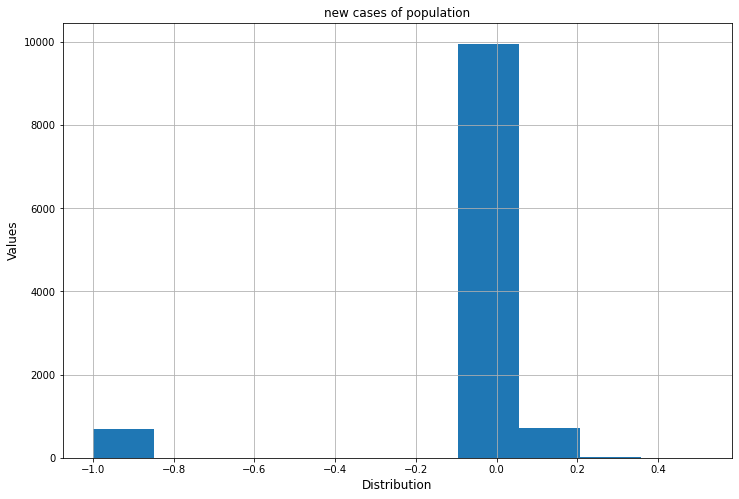

In [32]:
df2["new cases of population"].hist(figsize=(12,8))
plt.xlabel("Distribution",fontsize = 12)
plt.ylabel("Values",fontsize = 12)
plt.title("new cases of population",fontsize = 12)
plt.show()

 <h3 style="color:#8B0000;"> Storing Features into "X" matrix and Response (new cases of population) into "y" vector:</h3>

In [33]:
#Features
X = day_count.loc[:,day_count.columns != 'new cases of population']
#Response
y = day_count['new cases of population']  

<h3 style="color:#8B0000;">Divide the dataset into training set and testing set (80 percent train and 20 percent test):</h3>

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  

## Decision Tree  Regression Model:

<h3 style="color:#8B0000;">Import DecisionTreeRegressor from sklearn tree class:</h3>


In [35]:
from sklearn.tree import DecisionTreeRegressor

<h3 style="color:#8B0000;">Initialize the DecisionTreeRegressor model with  default parameters:</h3>

In [36]:
Dt_regressor = DecisionTreeRegressor()

<h3 style="color:#8B0000;">Train the DecisionTreeRegressor model on trainig data set:</h3>

In [37]:
Dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

<h3 style="color:#8B0000;">Make predictions using DecisionTreeRegressor and display the first 30 predicted values:</h3>

In [38]:
y_pred = Dt_regressor.predict(X_test)
y_pred[0:30]

array([ 1.72690462e-02,  1.66430631e-02,  3.00897140e-03,  5.15203986e-03,
        1.18226998e-02,  1.04821565e-02,  2.17571942e-02,  1.33109976e-02,
        1.34190297e-02,  1.09149705e-01,  5.24425099e-03,  5.48358484e-03,
       -1.00000000e+00,  6.60357257e-03,  4.83389773e-02,  4.41429638e-02,
        6.45860267e-03,  1.14378547e-04,  1.11254865e-02,  2.65707231e-02,
        1.09802921e-02,  0.00000000e+00,  2.10049885e-03,  3.96155953e-02,
        1.57463419e-02,  1.60788297e-02,  1.35097534e-02,  1.13788580e-03,
        5.30776828e-03,  2.02917960e-03])

<h3 style="color:#8B0000;">Compare the Actual Vs Predictd Values in the Test Set:</h3>

In [39]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2.head(10)  

,Actual,Predicted
92023,0.016766,0.017269
23888,0.016539,0.016643
39467,0.002847,0.003009
34830,0.005162,0.005152
48839,0.012353,0.011823
95141,0.010305,0.010482
6455,0.021619,0.021757
31207,0.014060,0.013311
67833,0.013465,0.013419
54110,0.119880,0.109150


<h3 style="color:#8B0000;"> Evaluate the DecisionTreeRegressor Model Using R2 and  RMSE evaluation metrics:</h3>

In [40]:
from sklearn import metrics  
Dt_R2_score = metrics.r2_score(y_test, y_pred)
print('R2 Score:', Dt_R2_score)  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

R2 Score: 0.9998201217736046
Root Mean Squared Error: 0.0031413521491128462


## Random Forest Regression Model:

<h3 style="color:#8B0000;">Import RandomForestRegressor from sklearn ensemble class:</h3>


In [41]:
from sklearn.ensemble import RandomForestRegressor 

<h3 style="color:#8B0000;">Initialize the RandomForestRegressor model with  n_estimators=100 parameters:</h3>

In [42]:
Rf_Regressor = RandomForestRegressor(n_estimators=100, random_state=0,) 

<h3 style="color:#8B0000;">Train the RandomForestRegressor model on trainig data set:</h3>

In [43]:
Rf_Regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

<h3 style="color:#8B0000;">Make predictions using RandomForestRegressor mdoel and display the first 30 predicted values:</h3>

In [44]:
y_pred = Rf_Regressor.predict(X_test)
y_pred[0:30]

array([ 1.64057866e-02,  1.66391493e-02,  3.07745962e-03,  5.11565955e-03,
        1.23254591e-02,  1.01835218e-02,  2.14866317e-02,  1.38608677e-02,
        1.33476067e-02,  1.16459128e-01,  5.24425099e-03,  5.70398717e-03,
       -1.00000000e+00,  7.80491470e-03,  4.86822552e-02,  4.50916579e-02,
        6.87627384e-03,  1.25872627e-04,  1.15628679e-02,  2.68384264e-02,
        1.10003462e-02,  0.00000000e+00,  2.11094362e-03,  3.94115613e-02,
        1.58986620e-02,  1.60207305e-02,  1.34852277e-02,  1.21128723e-03,
        1.21405834e-02,  2.02348084e-03])

<h3 style="color:#8B0000;">Compare the Actual Vs Predictd Values in the Test Set:</h3>

In [45]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df3.head(10)  

,Actual,Predicted
92023,0.016766,0.016406
23888,0.016539,0.016639
39467,0.002847,0.003077
34830,0.005162,0.005116
48839,0.012353,0.012325
95141,0.010305,0.010184
6455,0.021619,0.021487
31207,0.014060,0.013861
67833,0.013465,0.013348
54110,0.119880,0.116459


<h3 style="color:#8B0000;"> Evaluate the RandomForestRegressor Model Using R2 and  RMSE evaluation metrics:</h3>

In [46]:
from sklearn import metrics  
Rf_R2_score = metrics.r2_score(y_test, y_pred)
print('R2 Score:', Rf_R2_score)  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

R2 Score: 0.9993000216337925
Root Mean Squared Error: 0.006196830747365427


### Conclusion: 

We can see that Decision Tree gave the performance of R2=  99.14% and RMSE = 0.0212, whereas Random Forest gave the performance of R2 = 99.76% and RMSE = 0.0112, both performed well on this data set but Random Forest seems performing a little better than Decision Tree in terms of evaluation metrics to predit 'new cases of population' using this data set.